<h2><b>Stimulus selection</b><h2>
<p>Selecting the 10 disgust and fear-inducing videos used in the video ratings task</p>
<p>All come from the CowenKeltner Emotional videos dataset</p>
<p>This notebook uses the video ratings from this dataset to identify a set of five fear and five disgust-inducing videos which are:</p>
<li>Rated high (Upper quartile) for the emotion of interest (i.e., fear or disgust)
<li>Rated very low (0) for the opposite emotion (i.e., disgust or fear)
<li>Matched in valence
<li>Matched in arousal
<li>Not overly explicity or poor quality (check manually by EB)
<br>
<p>NB the csv file of ratings used in this notebook is only publically available through request from Cowen and Keltner.
<p>Therefore, it is not included here. But can be requested through this link: https://docs.google.com/forms/d/e/1FAIpQLScf9XVemSUWz6kUWySUdaQ5pxwqs8mugngrkBoLmX-3DMX1KA/viewform 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy import std, mean, sqrt

In [3]:
df=pd.read_csv(r"")

UNDERSTANDING THE DATA FRAME

After manual inspection of the column headings:

Relevant column headings: Fear, Disgust, approach, arousal, valence, angry disgust, arousal.1, bone-chilling terror, chills down spine, desire to avoid, disgust, disgusted contempt, disgusted surprise, dislike, distress, dominance.1, extreme disgust, extreme distress, extreme fear, fearful anger, fearful awe, fearful disgust, fearful surprise, feeling appalled, feeling attacked, feeling creeped out, feeling grossed out, feeling petrified, feeling threatened, freezing with terror, happy disgust, horror, nausea, revulsion, sad disgust, sad fear, self-digsgust, shame, terror, trembling with fear, 

FROM THE PAPER:

First 35 columns (with capitalised headings) = 'categorical judgement survey'
        ['Admiration', 'Adoration', 'Aesthetic Appreciation', 'Amusement',
       'Anger', 'Anxiety', 'Awe', 'Awkwardness', 'Boredom', 'Calmness',
       'Confusion', 'Contempt', 'Craving', 'Disappointment', 'Disgust',
       'Empathic Pain', 'Entrancement', 'Envy', 'Excitement', 'Fear', 'Guilt',
       'Horror', 'Interest', 'Joy', 'Nostalgia', 'Pride', 'Relief', 'Romance',
       'Sadness', 'Satisfaction', 'Sexual Desire', 'Surprise', 'Sympathy',
       'Triumph']

       In this survey, observers were required to select at least one category but could select as many as desired

Free response judgement survey --> collected free response judgements of emotions elicited by each video (just with a blank box that they had to fill in) 


        Think this is the end part of the dataframe - starting with 'feeling stimulated' and ending with 'zeal' (which is the final column)

Affective dimension judgment survey --> obtained rating scale judgments of the emotions elicited by each video (9 raters per video rated along 14 affective dimensions on a 0 point Likert scale --> where number 5 is neutral)

        Scales = appraoch, arousal, attention, certainty, commitment, control, dominance, effort, fairness, identity, obstruction, safety, upswing, valence

SELECTING DISGUST STIMULI

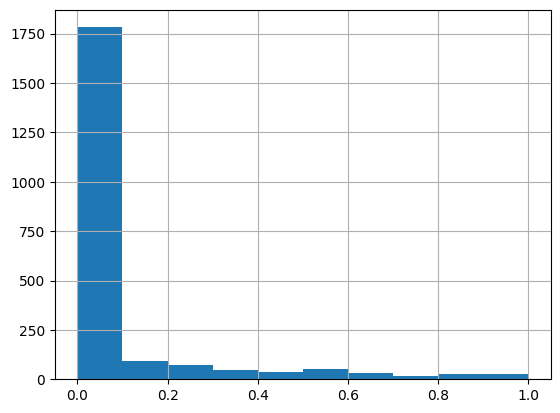

In [4]:
#plot distribution of Disgust ratings 
# #(from forced choice category selection - had to select categoryies of emotion the video evoked)
disgust = df.Disgust
disgust.hist()
plt.show()

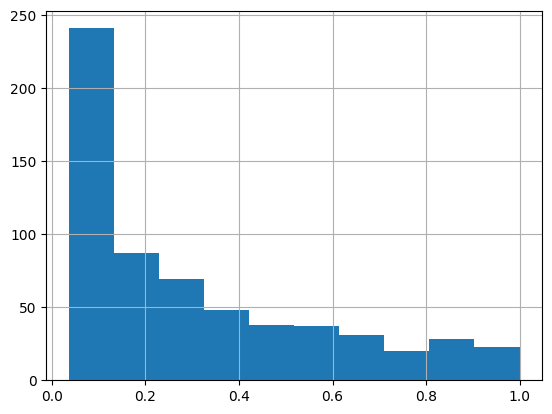

In [5]:
#remove those that were never selected as being disgusting
disgust_non_zero=disgust[disgust>0]
disgust_non_zero.hist()
plt.show()

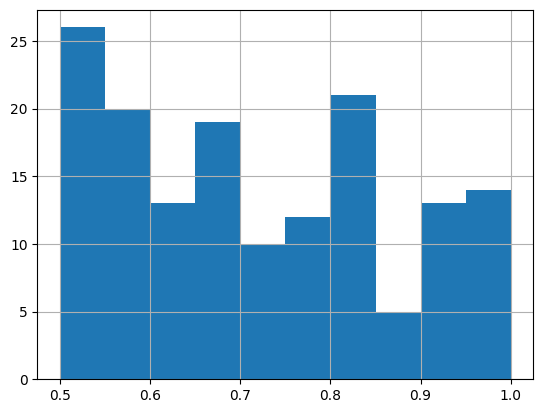

In [7]:
#select the upper quartile of these disgusting videos
disgust_UQ=np.quantile(disgust_non_zero, 0.75) 
above_disgust_UQ=disgust_non_zero[disgust_non_zero>disgust_UQ]
disgust_UQ_df=df[df.Disgust>disgust_UQ] ##make a dataframe with just these videos
above_disgust_UQ.hist()
plt.show()

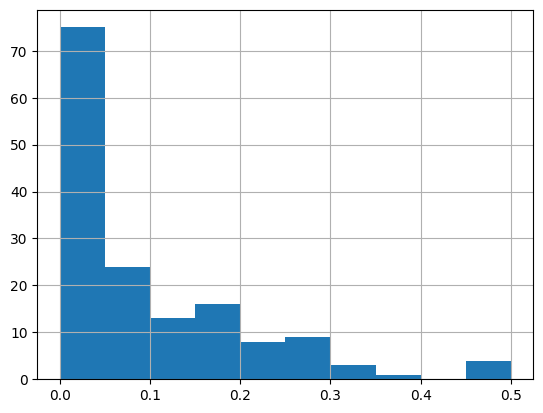

In [8]:
##View the fear ratings for these very disgusting videos
(disgust_UQ_df.Fear).hist()
plt.show()

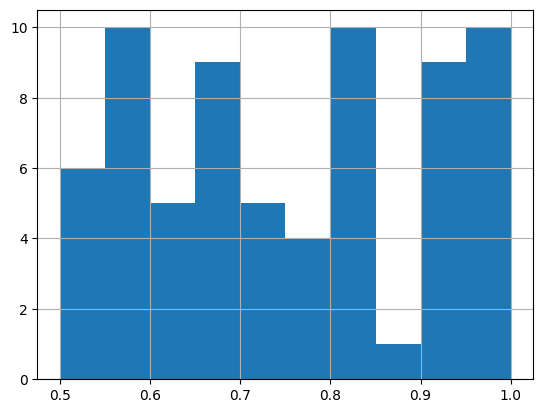

In [18]:
##Extract only the disgusting videos that are rated for 0 for fear and fearful disgust
disgust_UQ_fear_zero=disgust_UQ_df[disgust_UQ_df.Fear==0]
disgust_UQ_fear_zero=disgust_UQ_fear_zero[disgust_UQ_fear_zero.fear==0]
disgust_UQ_fear_zero=disgust_UQ_fear_zero[disgust_UQ_fear_zero['fearful disgust']==0]
(disgust_UQ_fear_zero.Disgust).hist()
plt.show()

In [20]:
##extract details of these final 69 disgust-inducing videos
disgust_df=disgust_UQ_fear_zero[['Filename', 'disgust', 'Disgust', 'Fear', 'fear', 'anxiety', 'valence', 'extreme disgust', 'extreme fear', 'fearful disgust', 'arousal']]
print("valence: mean = "+str(np.mean(disgust_df.valence))+" standard deviation: "+str(np.std(disgust_df.valence)))
print("arousal = "+str(np.mean(disgust_df.arousal))+" standard deviation: "+str(np.std(disgust_df.arousal)))

valence: mean = 2.235102898550725 standard deviation: 0.8225141061247565
arousal = 4.814813043478261 standard deviation: 0.9476628567796265


NOW DO THE SAME FOR FEAR!!

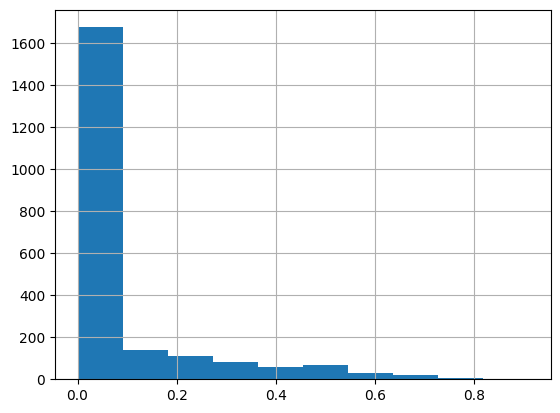

In [22]:
#plot distribution
fear = df.Fear
fear.hist()
plt.show()

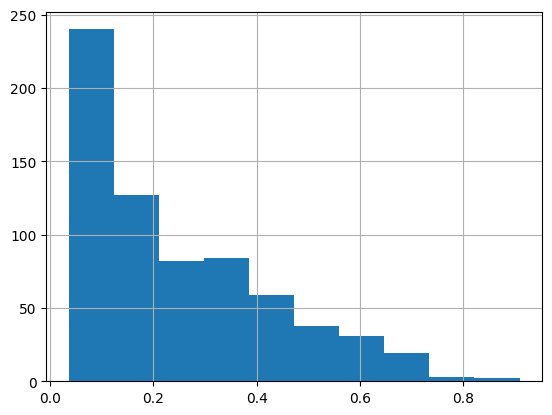

In [23]:
#remove stimuli with 0 fear ratings
fear_non_zero=fear[fear>0]
fear_non_zero.hist()
plt.show()

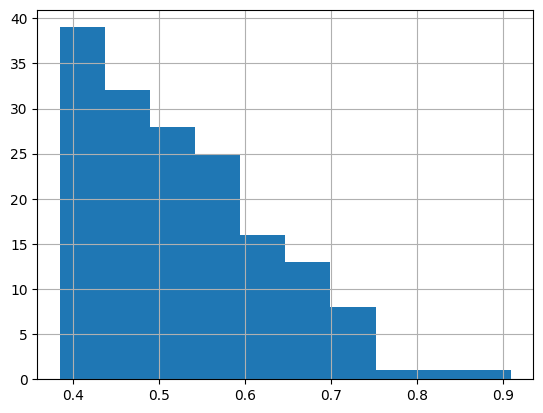

In [25]:
#select upperquartile of these frightening videos
fear_UQ=np.quantile(fear_non_zero, 0.75) 
above_fear_UQ=fear_non_zero[fear_non_zero>fear_UQ]
fear_UQ_df=df[df.Fear>fear_UQ] #make dataframe with these videos
above_fear_UQ.hist()
plt.show()

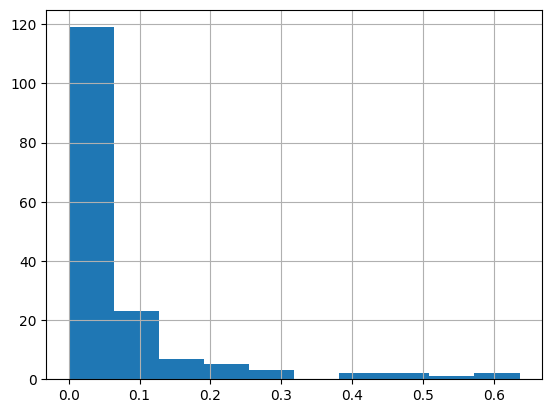

In [26]:
#plot disgust scores for these stimuli
(fear_UQ_df.Disgust).hist()
plt.show()

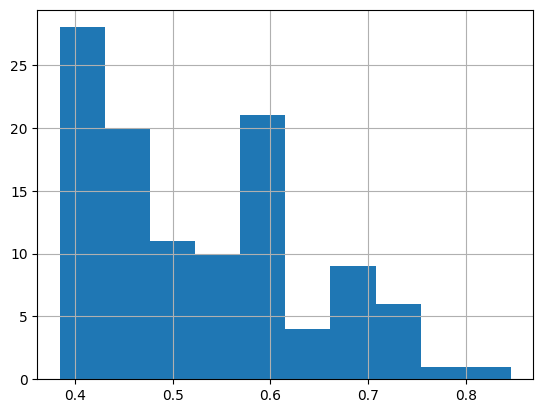

In [27]:
#exclude videos with non-zero ratings for disgust or fearful disgust
fear_UQ_disgust_zero=fear_UQ_df[fear_UQ_df.Disgust==0]
fear_UQ_disgust_zero=fear_UQ_disgust_zero[fear_UQ_disgust_zero.disgust==0]
fear_UQ_disgust_zero=fear_UQ_disgust_zero[fear_UQ_disgust_zero['fearful disgust']==0]
(fear_UQ_disgust_zero.Fear).hist()
plt.show()

In [28]:
#extract details of these final 111 fear-inducing videos
fear_df=fear_UQ_disgust_zero[['Filename', 'disgust', 'Disgust', 'Fear', 'fear', 'anxiety', 'valence', 'extreme disgust', 'extreme fear', 'fearful disgust', 'arousal']]
print("valence: mean = "+str(np.mean(fear_df.valence))+" standard deviation: "+str(np.std(fear_df.valence)))
print("arousal = "+str(np.mean(fear_df.arousal))+" standard deviation: "+str(np.std(fear_df.arousal)))

valence: mean = 3.2372342342342346 standard deviation: 1.2266714626200432
arousal = 6.393395495495496 standard deviation: 0.7778190968709799


MATCHING AROUSAL AND VALENCE RATINGS

[]

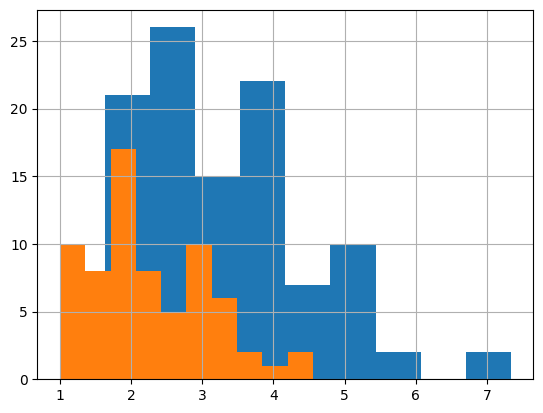

In [29]:
#plot distrubutions of fear and disgust valences 
##for valence - low = worse (scale of 1-9 with 5 being neutral)
(fear_df.valence).hist()
(disgust_df.valence).hist()
plt.plot()

#from this choose valence between 1.5 and 3.5

In [30]:
#include only videos in overlapping zone of valence
disgust_df_val=disgust_df[disgust_df.valence<3.5]
disgust_df_val=disgust_df_val[disgust_df_val.valence>1.5]

fear_df_val=fear_df[fear_df.valence<3.5]
fear_df_val=fear_df_val[fear_df_val.valence>1.5]

[]

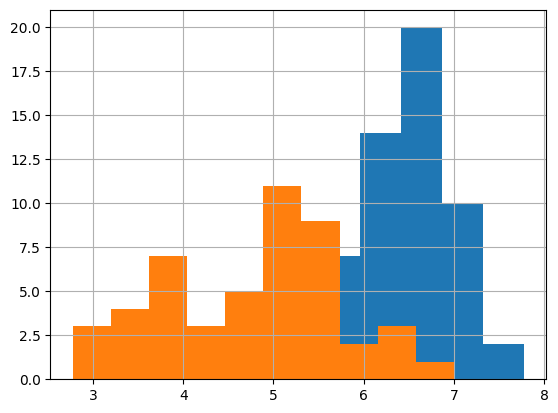

In [31]:
(fear_df_val.arousal).hist()
(disgust_df_val.arousal).hist()
plt.plot()

##from this chose arousal between 5 and 6

In [32]:
##extract just those in the overlapping valence range
disgust_df_val_aro=disgust_df_val[disgust_df_val.arousal>5]
disgust_df_val_aro=disgust_df_val_aro[disgust_df_val_aro.arousal<6]

fear_df_val_aro=fear_df_val[fear_df_val.arousal>5]
fear_df_val_aro=fear_df_val_aro[fear_df_val_aro.arousal<6]

In [33]:
#drop videos that are poor quality, too extreme scores, too graphic etc
disgust_df_val_aro=disgust_df_val_aro.drop([443, 838, 2080, 2115]) #exclude explicit and watermark
disgust_df_val_aro=disgust_df_val_aro.drop([828, 1588, 1626]) #exclude extreme valence

fear_df_val_aro=fear_df_val_aro.drop([1754, 1925, 939]) #to exclude poor quality videos
fear_df_val_aro=fear_df_val_aro.drop([1000, 1291, 1738]) ##too high arousal
fear_df_val_aro=fear_df_val_aro.drop([1125, 1203]) #extreme valence

In [36]:
#removing disgust videos to make set of 5 (already are only 5 fear videos)
disgust_reduced=disgust_df_val_aro.drop([873, 1939]) ##too similar to 1765 and 1414
disgust_reduced=disgust_reduced.drop([1906]) ##exceptionally high disgust score

In [47]:
#selected fear videos
fear_df_val_aro.Filename

45      0046.mp4
373     0374.mp4
547     0548.mp4
876     0877.mp4
1201    1202.mp4
Name: Filename, dtype: object

In [49]:
#selected disgusting videos
disgust_reduced.Filename

887     0888.mp4
1413    1414.mp4
1764    1765.mp4
1986    1987.mp4
2105    2106.mp4
Name: Filename, dtype: object

CHECK THAT THE TWO SETS ARE MATCHED - STATS TESTING

In [38]:
def cohen_d(x,y):
    nx=len(x)
    ny=len(y)
    dof=nx+ny-2
    return  (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [40]:
##test arousal differences
t_test=stats.ttest_ind(a=fear_df_val_aro.arousal, b=disgust_reduced.arousal)
print(t_test)
print(t_test.confidence_interval(confidence_level=0.95))
print(cohen_d(fear_df_val_aro.arousal, disgust_reduced.arousal))

TtestResult(statistic=np.float64(0.7715192229534258), pvalue=np.float64(0.4625770768890588), df=np.float64(8.0))
ConfidenceInterval(low=np.float64(-0.22100805576375943), high=np.float64(0.44324805576376053))
0.48795160062721715


In [41]:
#test valence differences
t_test=stats.ttest_ind(a=fear_df_val_aro.valence, b=disgust_reduced.valence)
print(t_test)
print(t_test.confidence_interval(confidence_level=0.95))
print(cohen_d(fear_df_val_aro.valence, disgust_reduced.valence))

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(8.0))
ConfidenceInterval(low=np.float64(-0.6009091096091738), high=np.float64(0.6009091096091738))
0.0


<h3><b>Finding a 'safe' video</b></h3>
<p>To be used as a non-aversive, 'safe' feedback across all blocks</p>
<p>Criteria: </p>
<li>Not disgusting
<li>Not frightening
<li>Neutral valence
<li>High arousal (matched to fear and disgust)
<li>High interesting ratings
<P>NB high arousal and high interestingness is to avoid 'morbid curiosity' and people wanting to watch fear/disgust videos due to boredom

In [42]:
#alternative outcome must not contain fear or disgust
non_fear=df[df.Fear==0]
non_fear=non_fear[non_fear.fear==0]
non_fear_non_disgust=non_fear[non_fear.Disgust==0]
non_fear_non_disgust=non_fear_non_disgust[non_fear_non_disgust.disgust==0]
non_fear_non_disgust=non_fear_non_disgust[non_fear_non_disgust['fearful disgust']==0]


In [43]:
#want it to be highly interesting
interest_df=non_fear_non_disgust[non_fear_non_disgust.interest>0]
interest_UQ=np.quantile(interest_df.interest, 0.75)
interest_UQ_df=interest_df[interest_df.interest>interest_UQ]
interest_UQ_df=interest_UQ_df[interest_UQ_df.boredom==0]
interest_UQ_df=interest_UQ_df[interest_UQ_df.Boredom==0]

In [44]:
#want it arousal matched (again so it is interesting)
interest_UQ_aro=interest_UQ_df[interest_UQ_df.arousal>5]
interest_UQ_aro=interest_UQ_df[interest_UQ_df.arousal<6.5]

In [50]:
#with broadly neutral valence (4-6/10)
interest_UQ_aro_val=interest_UQ_aro[interest_UQ_aro.valence>4]
interest_UQ_aro_val=interest_UQ_aro_val[interest_UQ_aro_val.valence<6]

1685    1686.mp4
Name: Filename, dtype: object

In [51]:
#selected stimulus:
interest_UQ_aro_val.Filename

1685    1686.mp4
Name: Filename, dtype: object